### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

660510751 กิตติพล

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [41]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [42]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [43]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [44]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

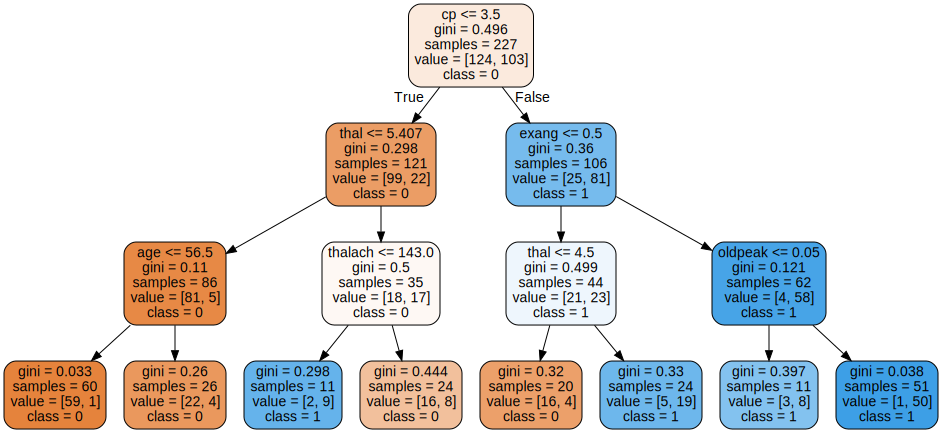

In [45]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [46]:
clf = DecisionTreeClassifier()

## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [47]:
rf_clf = RandomForestClassifier(random_state=42)

rf_params = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [3, 6, 9, None],    # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split an internal node
}

rf_gridcv = GridSearchCV(rf_clf, rf_params, scoring='accuracy', cv=5)
rf_gridcv.fit(X_train, y_train)

best_rf_model = rf_gridcv.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
rf_f1 = f1_score(y_test, y_pred_rf, average='macro')
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print("Best Random Forest Model:")
print(best_rf_model)
print(f"\nRandom Forest f1_macro score on test set: {rf_f1:.4f}")
print(f"Random Forest accuracy score on test set: {rf_accuracy:.4f}")

Best Random Forest Model:
RandomForestClassifier(max_depth=3, n_estimators=50, random_state=42)

Random Forest f1_macro score on test set: 0.7447
Random Forest accuracy score on test set: 0.7500


#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

Best Decision Tree Model:
Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3, random_state=42))])

Decision Tree f1_macro score on test set: 0.6882
Decision Tree accuracy score on test set: 0.6974

Summary of best models:
Decision Tree: f1_macro=0.6882, accuracy=0.6974
Bagging:      f1_macro=0.8157, accuracy=0.8158
RandomForest: f1_macro=0.7447, accuracy=0.7500

Best model based on f1_macro: Bagging


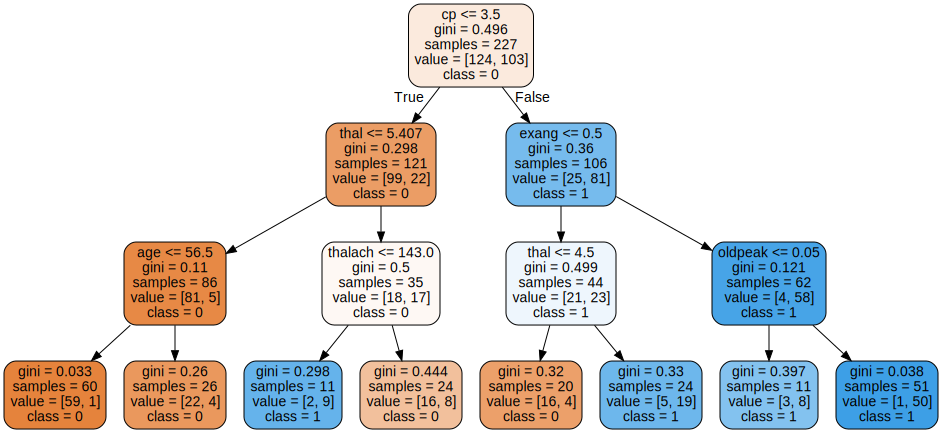


Best hyperparameters for Decision Tree:
{'decisiontreeclassifier__max_depth': 3, 'decisiontreeclassifier__min_samples_leaf': 1, 'decisiontreeclassifier__min_samples_split': 2}

Best hyperparameters for Bagging:
{'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 100}

Best hyperparameters for Random Forest:
{'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}


In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score, accuracy_score
from sklearn.tree import export_graphviz
import graphviz

# Decision Tree Grid Search
dt_params = {
        'decisiontreeclassifier__max_depth': [3, 6, 9, None],
        'decisiontreeclassifier__min_samples_split': [2, 5, 10],
        'decisiontreeclassifier__min_samples_leaf': [1, 2, 4]
}
dt_pipe = make_pipeline(DecisionTreeClassifier(random_state=42))
dt_gridcv = GridSearchCV(dt_pipe, dt_params, scoring='accuracy', cv=5)
dt_gridcv.fit(X_train, y_train)
best_dt_model = dt_gridcv.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)
dt_f1 = f1_score(y_test, y_pred_dt, average='macro')
dt_accuracy = accuracy_score(y_test, y_pred_dt)

print("Best Decision Tree Model:")
print(best_dt_model)
print(f"\nDecision Tree f1_macro score on test set: {dt_f1:.4f}")
print(f"Decision Tree accuracy score on test set: {dt_accuracy:.4f}")

# Assuming bagging_f1, bagging_accuracy, rf_f1, rf_accuracy, bagging_gridcv, rf_gridcv
# are available from previous code execution (cells Z-Z_Hlf-NhA0 and wBZHX4af1H5D)

# summary
print("\nSummary of best models:")
print(f"Decision Tree: f1_macro={dt_f1:.4f}, accuracy={dt_accuracy:.4f}")
print(f"Bagging:      f1_macro={bagging_f1:.4f}, accuracy={bagging_accuracy:.4f}")
print(f"RandomForest: f1_macro={rf_f1:.4f}, accuracy={rf_accuracy:.4f}")

# Best model selection based on f1_macro
scores = {
        'Decision Tree': dt_f1,
        'Bagging': bagging_f1,
        'Random Forest': rf_f1
}
best_model_name = max(scores, key=scores.get)
print(f"\nBest model based on f1_macro: {best_model_name}")


# Plot the best single Decision Tree model (as it was trained on all features)
tree_to_plot = best_dt_model.named_steps['decisiontreeclassifier']

plot_data = export_graphviz(
        tree_to_plot,
        out_file=None,
        filled=True,
        rounded=True,
        feature_names=data.columns[:-1], # Use feature names from the original data
        class_names=['0', '1']
)
graph = graphviz.Source(plot_data)
display(graph)


# Best values of hyperparameters
print("\nBest hyperparameters for Decision Tree:")
print(dt_gridcv.best_params_)
print("\nBest hyperparameters for Bagging:")
print(bagging_gridcv.best_params_)
print("\nBest hyperparameters for Random Forest:")
print(rf_gridcv.best_params_)